In [41]:
import os
import sys
print("path: ",os.getcwd())


%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np 
import pandas as pd


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Activation
from keras.callbacks import ModelCheckpoint
from keras import activations

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

path:  C:\Users\HP\Desktop\projet_MLA\dev-clean\LibriSpeech


# Data preparation:

In [16]:
#___utils:
def read_text():
    path_label=r"C:\Users\HP\Desktop\projet_MLA\dev-clean\LibriSpeech\SPEAKERS.txt"
    with open(path_label) as file:
        text=file.read().splitlines()
        return text 
    

def label_data(text, dir_level_0):
    gender={}
    for line_text in text:
        line=line_text.split("|")
        for folder_1 in dir_level_0: 
            if int(line[0]) == int(folder_1):
                gender[str(folder_1)]=line[1]
    
    return gender

#delete space from stinrg:
def pop_space(s):
    for i in s:
        if i=='M':
            return 'M'
        elif i=='F':
            return 'F'

In [17]:
path=r"C:\Users\HP\Desktop\projet_MLA\dev-clean\LibriSpeech\dev-clean"
#path=os.getcwd()+'\\'+"dev-clean"
#print(path)
os.chdir(path)

text_file_name=[]
text_data=[]

audio_file_name=[]
audio_path=[]

gender=[]
gender_list_dir=[]

file_name=None
text=None

#_________________________________________

dir_level_0=os.listdir(path)

#_____label data by gender:
text_label=read_text()
gender_dir=label_data(text_label,dir_level_0)

#______level dir 0: 
for folder_1 in dir_level_0:
    
    #______level dir 1:
    
    #path to folder
    path_level_1=str(os.getcwd())+"\\"+folder_1
    
    #change directory:
    os.chdir(path_level_1)
    
    #list of dir in dir_level_1:
    dir_level_1=os.listdir(path_level_1)
    
    
    #print("______________________________________")
    #print("dossier externe: ",folder_1)
    #print("......................................")
     
    for folder_2 in dir_level_1:
        #______level dir 2:
        
        #path to folder
        path_level_2=str(os.getcwd())+"\\"+folder_2
        
        #change directory:
        os.chdir(path_level_2)
        
        #list dir level_2
        dir_level_2=os.listdir(path_level_2)
        
        #print('--------------------------------------')
        #print("dossier interne: ",folder_2)
        #print("......................................")
        
        
        for file in dir_level_2:
            file_name=file
            if file.endswith('txt'):
                #path file:
                path_file=path_level_2+'\\'+file
                
                #open file
                with open(path_file) as f:
                    text = f.read().splitlines()
                    
        
        for i, file in enumerate(dir_level_2):
            #______level dir 3:
            
            if file.endswith('flac'):
                #append audio path :
                audio_path.append(path_level_2+'\\'+file)
                #append audio path :
                audio_file_name.append(file)

                #append text_data
                text_data.append(text[i])
                #append text_name:
                text_file_name.append(file_name)
                
                #label data gender:
                #gender.append(label_data(text_label, folder_1))
                gender_list_dir.append(folder_1)
                gender.append(pop_space(gender_dir[folder_1]))
                
            
        #return to preious directory :
        os.chdir('../')
  
    
    #return to preious directory :
    os.chdir('../')

#return to preious directory :
os.chdir('../')

In [18]:
audio_data={"gender_list_dir":gender_list_dir,"gender":gender,"text_name":text_file_name,"text_data":text_data,"audio_name":audio_file_name,"audio_path":audio_path}

df=pd.DataFrame.from_dict(audio_data)

In [19]:
# saving as a CSV file
#df.to_csv('dataset_paths.csv', sep =',', index=False)
df[0:20]

,gender_list_dir,gender,text_name,text_data,audio_name,audio_path
0,1272,M,1272-128104.trans.txt,1272-128104-0000 MISTER QUILTER IS THE APOSTLE...,1272-128104-0000.flac,C:\Users\HP\Desktop\projet_MLA\dev-clean\Libri...
1,1272,M,1272-128104.trans.txt,1272-128104-0001 NOR IS MISTER QUILTER'S MANNE...,1272-128104-0001.flac,C:\Users\HP\Desktop\projet_MLA\dev-clean\Libri...
2,1272,M,1272-128104.trans.txt,1272-128104-0002 HE TELLS US THAT AT THIS FEST...,1272-128104-0002.flac,C:\Users\HP\Desktop\projet_MLA\dev-clean\Libri...
3,1272,M,1272-128104.trans.txt,1272-128104-0003 HE HAS GRAVE DOUBTS WHETHER S...,1272-128104-0003.flac,C:\Users\HP\Desktop\projet_MLA\dev-clean\Libri...
4,1272,M,1272-128104.trans.txt,1272-128104-0004 LINNELL'S PICTURES ARE A SORT...,1272-128104-0004.flac,C:\Users\HP\Desktop\projet_MLA\dev-clean\Libri...
5,1272,M,1272-128104.trans.txt,1272-128104-0005 IT IS OBVIOUSLY UNNECESSARY F...,1272-128104-0005.flac,C:\Users\HP\Desktop\projet_MLA\dev-clean\Libri...
6,1272,M,1272-128104.trans.txt,1272-128104-0006 ON THE GENERAL PRINCIPLES OF ...,1272-128104-0006.flac,C:\Users\HP\Desktop\projet_MLA\dev-clean\Libri...
7,1272,M,1272-128104.trans.txt,1272-128104-0007 PAINTING HE TELLS US IS OF A ...,1272-128104-0007.flac,C:\Users\HP\Desktop\projet_MLA\dev-clean\Libri...
8,1272,M,1272-128104.trans.txt,1272-128104-0008 AS FOR ETCHINGS THEY ARE OF T...,1272-128104-0008.flac,C:\Users\HP\Desktop\projet_MLA\dev-clean\Libri...
9,1272,M,1272-128104.trans.txt,1272-128104-0009 HE LAMENTS MOST BITTERLY THE ...,1272-128104-0009.flac,C:\Users\HP\Desktop\projet_MLA\dev-clean\Libri...


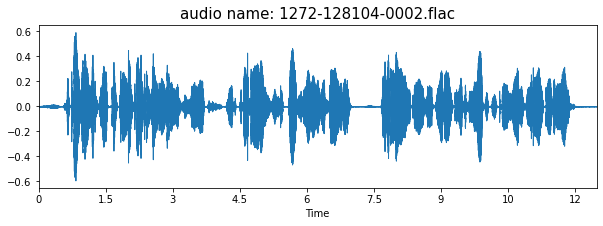

In [20]:
def plot(audio,sample_rate=16000, name="none"):
    plt.figure(figsize=(10, 3))
    plt.title('audio name: {}'.format(name), size=15)
    librosa.display.waveplot(audio, sr=sample_rate)
    plt.show()
    
    
audio=df.loc[2,"audio_path"]
audio_name=df.loc[2,"audio_name"]

#lire le fichier audio:
x, sr = librosa.load(audio, sr=16000)

#plot
plot(x,sr,audio_name)

#audio
ipd.Audio(x, rate=sr)  

# Data augmentation: 

In [21]:
"""
1. For each sample we extract 5 seconds of audio randomly
2. we apply a random shift along the time axis of up to 20% of the total input length
3. add small amounts of both uniformly distributed and normal distributed random noise.
4. All input data has been locally normalized to have zero mean.
"""

def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data


def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)


def extracte(data):
    len_data=len(data)
    sample_5_sec=5*16000  # 5 secondes * 16Khz
    
    #chech data len:
    if len_data>sample_5_sec:
        # get segment randomly:  random number [low=0 ,high=len_data - sample_5_sec]
        high = len_data - sample_5_sec
        low  = 0
        random_nb= np.random.randint(low,high,dtype=int)
        
        return data[random_nb:random_nb+sample_5_sec] 
    
    else:
        return data
    

def get_features(audio_path):
    """

    @the function do the data augmentation whith adding noise and extracting 5 secondes sample from the raw audio.
    param: audio path
    return ndarray: stacked 2 vectors audio 

    """
    
    # get audio signal
    data, sample_rate = librosa.load(audio_path, sr=16000)
    
    if len(data)>=80000: # 5 secondes at least
    
        # extracte 5 secondes from the audio wave:
        extracte_data = extracte(data)


        # data augmentation with adding noise
        noise_data = noise(extracte_data)

        # stack the two arrays vertically:
        result = np.vstack((extracte_data , noise_data)) 

        return result
    
    return None

# Unit test functions: noise, shift, extracte

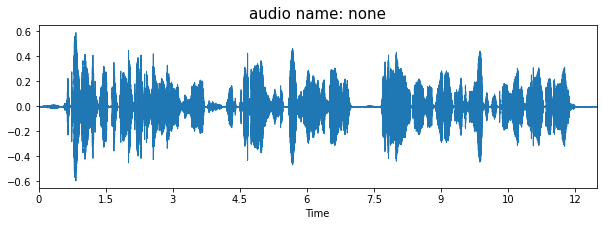

In [22]:
#add noise to audio :

x_noise=noise(x)

#plot:
plot(x_noise)

#audio
ipd.Audio(x_noise,rate=sr)

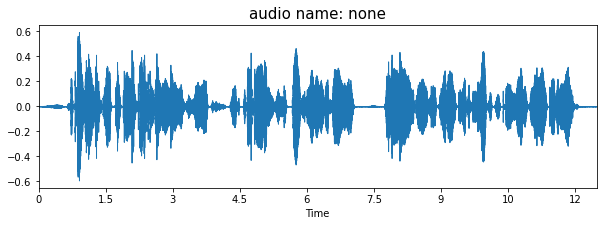

In [23]:
#shift audio :

x_shift =shift(x)

#plot:
plot(x_shift)

#audio
ipd.Audio(x_shift,rate=sr)

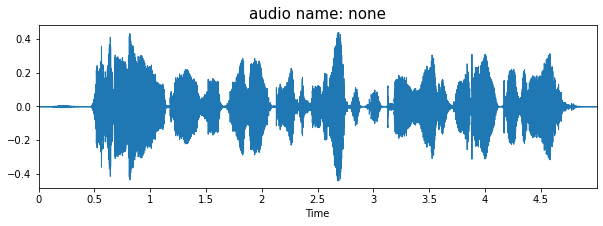

In [24]:
#extract data 5 secondes:
x_extract=extracte(x)

#plot:
plot(x_extract)

#audio
ipd.Audio(x_extract,rate=sr)

In [25]:
# data augmentation :
result= get_features(audio)
ipd.Audio(result[0,:],rate=16000)

In [26]:
# audio noise:
ipd.Audio(result[1,:],rate=16000)

In [27]:
def generate_data(dataframe):
    # list :
    X=[]
    Y=[]
    
    #gender : 0--> femelle, 1--->male
    gender_dict={"M":1, "F":0}
    
    # generate data for all audios:

    for audio , gender in zip(dataframe.loc[:,"audio_path"],dataframe.loc[:,"gender"]):
        
        #augmenter tout les audios:
        data_augmented = get_features(audio)
        
        #get only audio >= 5 secondes
        if data_augmented is not None:
            #label all the audios:
            for data in data_augmented:
                X.append(data)
                Y.append(gender_dict[gender])
            
    return X, Y

In [28]:
#data generation
X,Y=generate_data(df)

In [29]:
#data to DataFrame:
Features_df = pd.DataFrame.from_dict({"X":X,"Y":Y})
Features_df[0:20]

,X,Y
0,"[-0.00054931640625, -0.00054931640625, -0.0004...",1
1,"[0.005231613993502449, -0.01730229127652843, 0...",1
2,"[-0.18121337890625, -0.182281494140625, -0.187...",1
3,"[-0.18230441263874772, -0.16280626004314597, -...",1
4,"[-0.096282958984375, -0.103485107421875, -0.10...",1
5,"[-0.10141172615591637, -0.09815491723890304, -...",1
6,"[0.0821533203125, 0.097320556640625, 0.1094970...",1
7,"[0.07805512988522267, 0.0924502829744599, 0.12...",1
8,"[0.091522216796875, 0.081634521484375, 0.07113...",1
9,"[0.09998049529409177, 0.08243211922885776, 0.0...",1


In [30]:
#convert features to numpy array:
Features_npy=np.array(X, dtype=np.float)

In [31]:
#convert labels to numpy array:
Label_npy=np.array(Y,dtype=np.int)

In [32]:
#save features as npy:
np.save("Features.npy",Features_npy, allow_pickle=True, fix_imports=True)

In [33]:
#save labels as npy:
np.save("labels.npy",Label_npy, allow_pickle=True, fix_imports=True)

# Data : X_train, X_test, Y_train, Y_test

In [34]:
#load data:
path_data=r"C:\Users\HP\Desktop\projet_MLA\dev-clean\LibriSpeech"
Features=np.load(path_data+"\Features.npy")
Labels=np.load(path_data+"\Labels.npy")

In [35]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(Features, Labels, random_state=0, shuffle=True)
print("x_train:{} , y_train:{} , x_test:{} ,y_test:{}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train:(2377, 80000) , y_train:(2377,) , x_test:(793, 80000) ,y_test:(793,)


In [36]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print("x_train:{} , y_train:{} , x_test:{} ,y_test:{}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train:(2377, 80000) , y_train:(2377,) , x_test:(793, 80000) ,y_test:(793,)


In [37]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
print("x_train:{} , y_train:{} , x_test:{} ,y_test:{}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train:(2377, 80000, 1) , y_train:(2377,) , x_test:(793, 80000, 1) ,y_test:(793,)


# Model

In [53]:
#Résidual bloc:

def batch_normalization_Rulu(inputs):
    
    #apply a batchnormalization to an input tensor:
    bn = BatchNormalization()(inputs)
    
    #apply a rulu functgion to batch normalized tensor
    relu = ReLU()(bn)
    
    return relu